# Python APIs and Weather Data Graphs Analysis 

In [1]:
# Establish the dependencies for the project
import pandas as pd
import numpy as np
import time
from scipy import stats
from scipy.stats import linregress
import time
import requests
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
# setup for weather cities around the glob
from api_keys import weather_api_key

# import citipy to get latitude and longitude
from citipy import citipy

# Output File (CSV)
city_file = "output/Cities_01.csv"

# latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [3]:
# Base URL for Weather Map API Call

base_url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "Imperial"

#creating empty arrays to hold desired data
Cities_list = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat =[]
Lng =[]
Max_temp = []
Wind_Speed = []

print('''Table Data
----------------------------''')

#creating a counter to count city number being processed
city_counter = 1

#Looping through all cities in the list
for city in cities:
    
    # Build query URL based on current element in units
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    print(f'City {city_counter} of {len(cities)} | {city}')

    # Get weather data and store in Json format
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    #exception handling when data is not found
    try:
        
        #retrive desired data set and keep appending to the respective arrays
        w_Cloudiness = weather_json["clouds"]["all"]
        Cloudiness.append(w_Cloudiness)
    
        w_Country = weather_json["sys"]["country"]
        Country.append(w_Country)
    
        w_Date = weather_json["dt"]
        Date.append(w_Date)
    
        w_Humidity = weather_json["main"]["humidity"]
        Humidity.append(w_Humidity)
    
        w_Lat = weather_json["coord"]["lat"]
        Lat.append(w_Lat)
    
        w_Lng = weather_json["coord"]["lon"]
        Lng.append(w_Lng)
    
        w_Max_temp = weather_json["main"]["temp_max"]
        Max_temp.append(w_Max_temp)
    
        w_Wind_Speed = weather_json["wind"]["speed"]
        Wind_Speed.append(w_Wind_Speed)
    
        Cities_list.append(city)

        city_counter = city_counter + 1
    
    except KeyError:
        print(f"City not found. Skipping {city}...")
    
print('''---------------------
Table Data 
---------------------''')

Table Data
----------------------------
City 1 of 636 | teahupoo
City 2 of 636 | urumqi
City 3 of 636 | bolshaya izhora
City 4 of 636 | cap-aux-meules
City 5 of 636 | comodoro rivadavia
City 6 of 636 | vaini
City 7 of 636 | ushuaia
City 8 of 636 | esperance
City 9 of 636 | saint-philippe
City 10 of 636 | rikitea
City 11 of 636 | korgen
City 12 of 636 | hermanus
City 13 of 636 | atuona
City 14 of 636 | grand centre
City not found. Skipping grand centre...
City 14 of 636 | walvis bay
City 15 of 636 | qaanaaq
City 16 of 636 | arraial do cabo
City 17 of 636 | hithadhoo
City 18 of 636 | champerico
City 19 of 636 | okhotsk
City 20 of 636 | tsihombe
City not found. Skipping tsihombe...
City 20 of 636 | carutapera
City 21 of 636 | avarua
City 22 of 636 | barrow
City 23 of 636 | vestmanna
City 24 of 636 | codrington
City 25 of 636 | jamestown
City 26 of 636 | mataura
City 27 of 636 | punta arenas
City 28 of 636 | chapais
City 29 of 636 | hofn
City 30 of 636 | mys shmidta
City not found. Skippin

City 254 of 636 | odda
City 255 of 636 | acapulco
City 256 of 636 | pevek
City 257 of 636 | glinka
City 258 of 636 | biltine
City 259 of 636 | ostrovnoy
City 260 of 636 | mitsamiouli
City 261 of 636 | verkhoyansk
City 262 of 636 | belushya guba
City not found. Skipping belushya guba...
City 262 of 636 | fare
City 263 of 636 | plastun
City 264 of 636 | iquitos
City 265 of 636 | manado
City 266 of 636 | riachao das neves
City 267 of 636 | churapcha
City 268 of 636 | general pico
City 269 of 636 | saint george
City 270 of 636 | caravelas
City 271 of 636 | altar
City 272 of 636 | bonthe
City 273 of 636 | goderich
City 274 of 636 | olafsvik
City 275 of 636 | nelson bay
City 276 of 636 | lardos
City 277 of 636 | dien bien
City not found. Skipping dien bien...
City 277 of 636 | tacuati
City 278 of 636 | danjiangkou
City 279 of 636 | ilulissat
City 280 of 636 | sosnovka
City 281 of 636 | balad
City 282 of 636 | kaeo
City 283 of 636 | airai
City 284 of 636 | shimoda
City 285 of 636 | kruisfonte

City 511 of 636 | karoi
City 512 of 636 | ryotsu
City 513 of 636 | aswan
City 514 of 636 | sivaki
City 515 of 636 | cairns
City 516 of 636 | xining
City 517 of 636 | marcona
City not found. Skipping marcona...
City 517 of 636 | nuuk
City 518 of 636 | puerto escondido
City 519 of 636 | mar de espanha
City 520 of 636 | nishihara
City 521 of 636 | mujiayingzi
City 522 of 636 | telimele
City 523 of 636 | maniitsoq
City 524 of 636 | road town
City 525 of 636 | lompoc
City 526 of 636 | los llanos de aridane
City 527 of 636 | aksu
City 528 of 636 | daud khel
City 529 of 636 | raymond
City 530 of 636 | pendra
City 531 of 636 | boralday
City 532 of 636 | kosonsoy
City 533 of 636 | san cristobal
City 534 of 636 | awjilah
City 535 of 636 | voznesenye
City 536 of 636 | vila velha
City 537 of 636 | staryy nadym
City 538 of 636 | jiexiu
City 539 of 636 | jaguaruna
City 540 of 636 | jardim
City 541 of 636 | muzquiz
City not found. Skipping muzquiz...
City 541 of 636 | camacha
City 542 of 636 | bud
Ci

In [50]:
# Build the dataFrame for cities

cities_df = pd.DataFrame({
     'Date':Date,
     'Country':Country,
     'City':Cities_list,
     'Cloudiness':Cloudiness,
     'Humidity':Humidity,
     'Lat':Lat,
     'Lng':Lng,
     'Max Temp':Max_temp,
     'Wind Speed':Wind_Speed,
     })

#Saving CSV file
cities_df.to_csv(city_file)


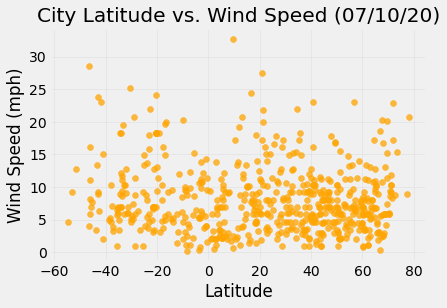

In [6]:
# Creating a function that takes y-axis values from the Weather DataFrame and creates a Scatter plot

def scatter_lat(y_axis_values,y_axis_label):
    Plot_Data = plt.scatter(cities_df['Lat'],cities_df[y_axis_values],alpha=0.75,facecolors = 'orange')
    
    #title that also shows the current date using a function from time module     
    plt.title(f"City Latitude vs. {y_axis_values} ({time.strftime('%m/%d/%y')})")
    
    #Labels     
    plt.xlabel('Latitude')
    plt.ylabel(y_axis_label)
    plt.grid(alpha = 0.25)
    
    #saving image
    plt.savefig(f'output/Lat_vs_{y_axis_values}.png')
    
#Plotting Wind Speed values
style.use('fivethirtyeight')
lat_vs_temp = scatter_lat('Wind Speed','Wind Speed (mph)')
plt.show()

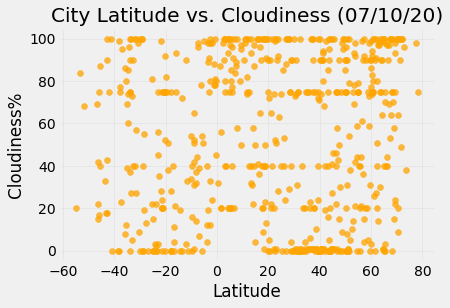

In [7]:
#calling the Scatterplot function for Cloudiness values     
lat_vs_temp = scatter_lat('Cloudiness','Cloudiness%')
plt.show()

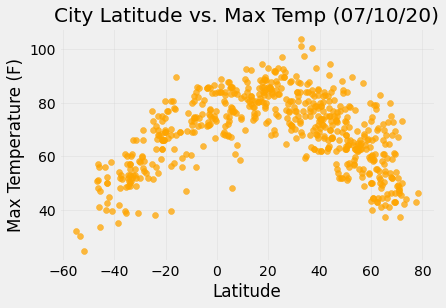

In [8]:
#calling the Scatterplot function for Maximum Temperatures values     
lat_vs_temp = scatter_lat('Max Temp','Max Temperature (F)')
plt.show()

In [38]:

# Creating a function that takes y-axis values from the corresponding DataFrame and creates a Linear Regression model

def linear_lat(df_name,y_axis_values,y_axis_label):
    Plot_Data = plt.scatter(df_name['Lat'],df_name[y_axis_values],alpha=0.75,facecolors = 'orange')
    
    # Build linear regression with latitude as x values and get y values from function parameter
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df_name['Lat'], df_name[y_axis_values])

    # Regression values
    regress_values = df_name['Lat'] * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #title that also shows the current date using a function from time module     
    plt.title(f"{df_name.name} Hemisphere - {y_axis_label} vs. Latitude Linear Regression ({time.strftime('%m/%d/%y')})")
    plt.plot(df_name['Lat'],regress_values,"r-", color='deepskyblue')
    x_annonate = min(df_name['Lat']) + 10
    y_annonate = min(df_name[y_axis_values]) + 30
    plt.annotate(line_eq,(x_annonate,y_annonate),fontsize=12,color="black")
    print(f"The r-squared is: {rvalue}")
    print(f"The Line Equation is: {line_eq}")
    
    #Labels     
    plt.xlabel('Latitude')
    plt.ylabel(y_axis_label)
    plt.grid(alpha = 0.25)
    
    #saving image
    plt.savefig(f'output/{df_name.name} Hemisphere {y_axis_values}_vs_Latitude_Linear_Regression.png')

In [49]:
# Setup Northern and Southern Hemisphere DataFrames
Northern = cities_df.loc[cities_df["Lat"]>=0]
Southern = cities_df.loc[cities_df["Lat"]<0]
Northern.name = 'Northern'
Southern.name = 'Southern'

The r-squared is: 0.029803585469620378
The Line Equation is: y = 0.01x +7.37


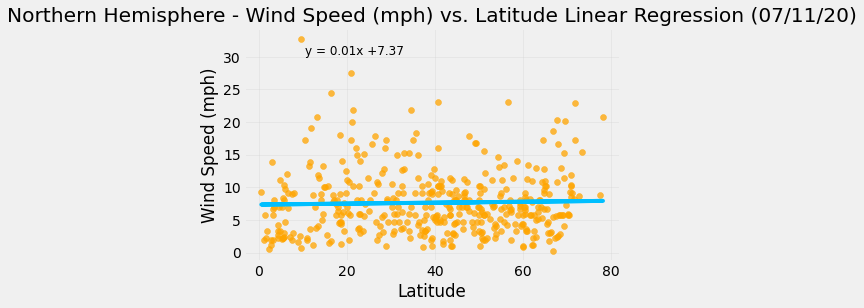

In [40]:
linear_lat(Northern,'Wind Speed','Wind Speed (mph)')
plt.show()

The r-squared is: -0.007296703847690165
The Line Equation is: y = -0.01x +55.5


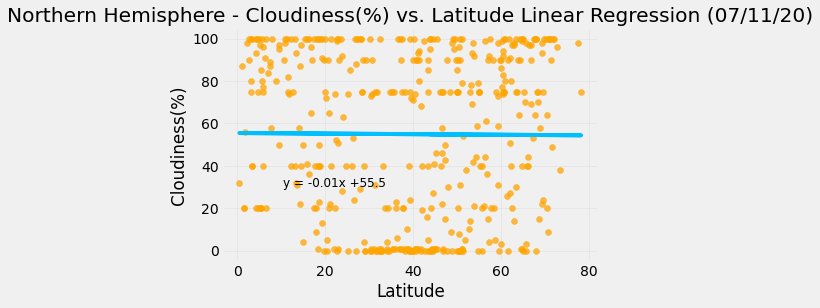

In [41]:
linear_lat(Northern,'Cloudiness','Cloudiness(%)')
plt.show()

The r-squared is: -0.05682399373524568
The Line Equation is: y = -0.06x +72.4


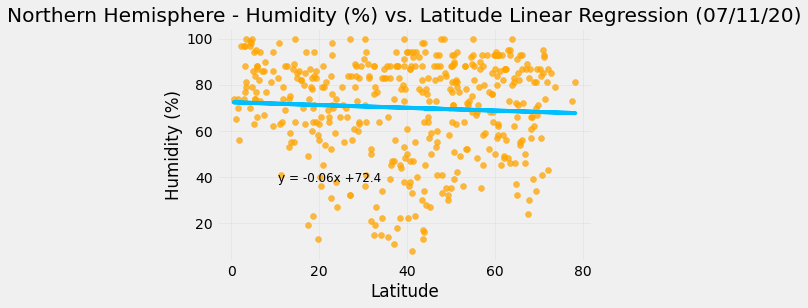

In [42]:
linear_lat(Northern,'Humidity','Humidity (%)')
plt.show()

The r-squared is: 0.14952353825499096
The Line Equation is: y = 0.17x +78.87


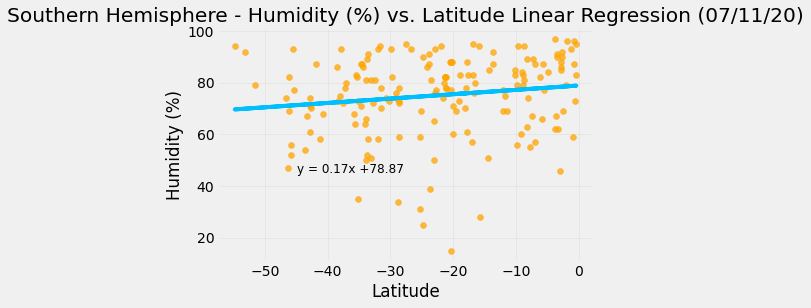

In [43]:
linear_lat(Southern,'Humidity','Humidity (%)')
plt.show()

The r-squared is: -0.6600657435174108
The Line Equation is: y = -0.44x +88.58


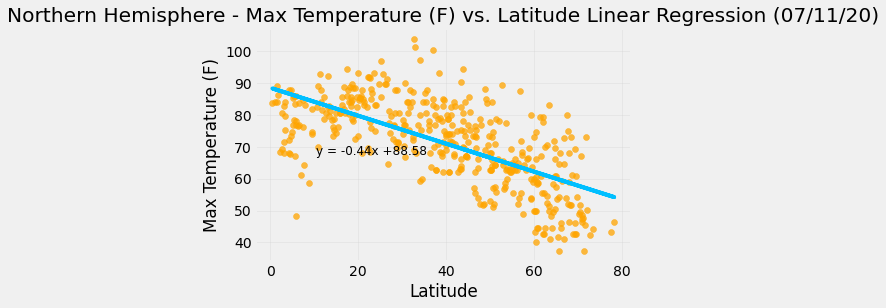

In [44]:
linear_lat(Northern,'Max Temp','Max Temperature (F)')
plt.show()